In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [2]:

data_dir = Path('../Tuberculosis_model/TB_Chest_Radiography_Database/')

data_dir

WindowsPath('../Tuberculosis_model/TB_Chest_Radiography_Database')

In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = data_dir / 'Normal'
Tuberculosis_cases_dir = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,..\Tuberculosis_model\TB_Chest_Radiography_Dat...,1
1,..\Tuberculosis_model\TB_Chest_Radiography_Dat...,0
2,..\Tuberculosis_model\TB_Chest_Radiography_Dat...,1
3,..\Tuberculosis_model\TB_Chest_Radiography_Dat...,0
4,..\Tuberculosis_model\TB_Chest_Radiography_Dat...,0


In [4]:
train_data.shape

(4200, 2)

0    3500
1     700
Name: label, dtype: int64


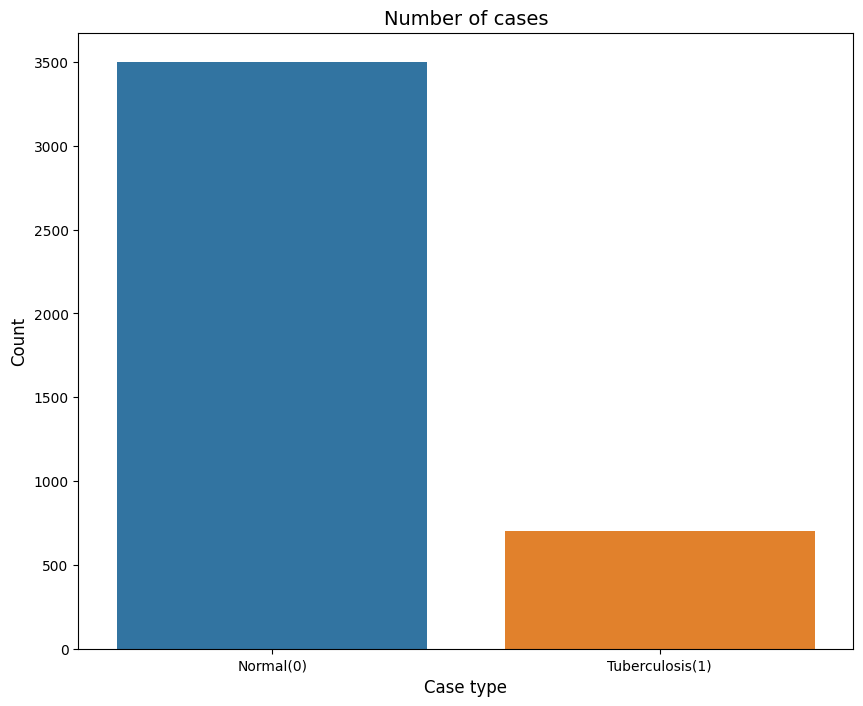

In [5]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

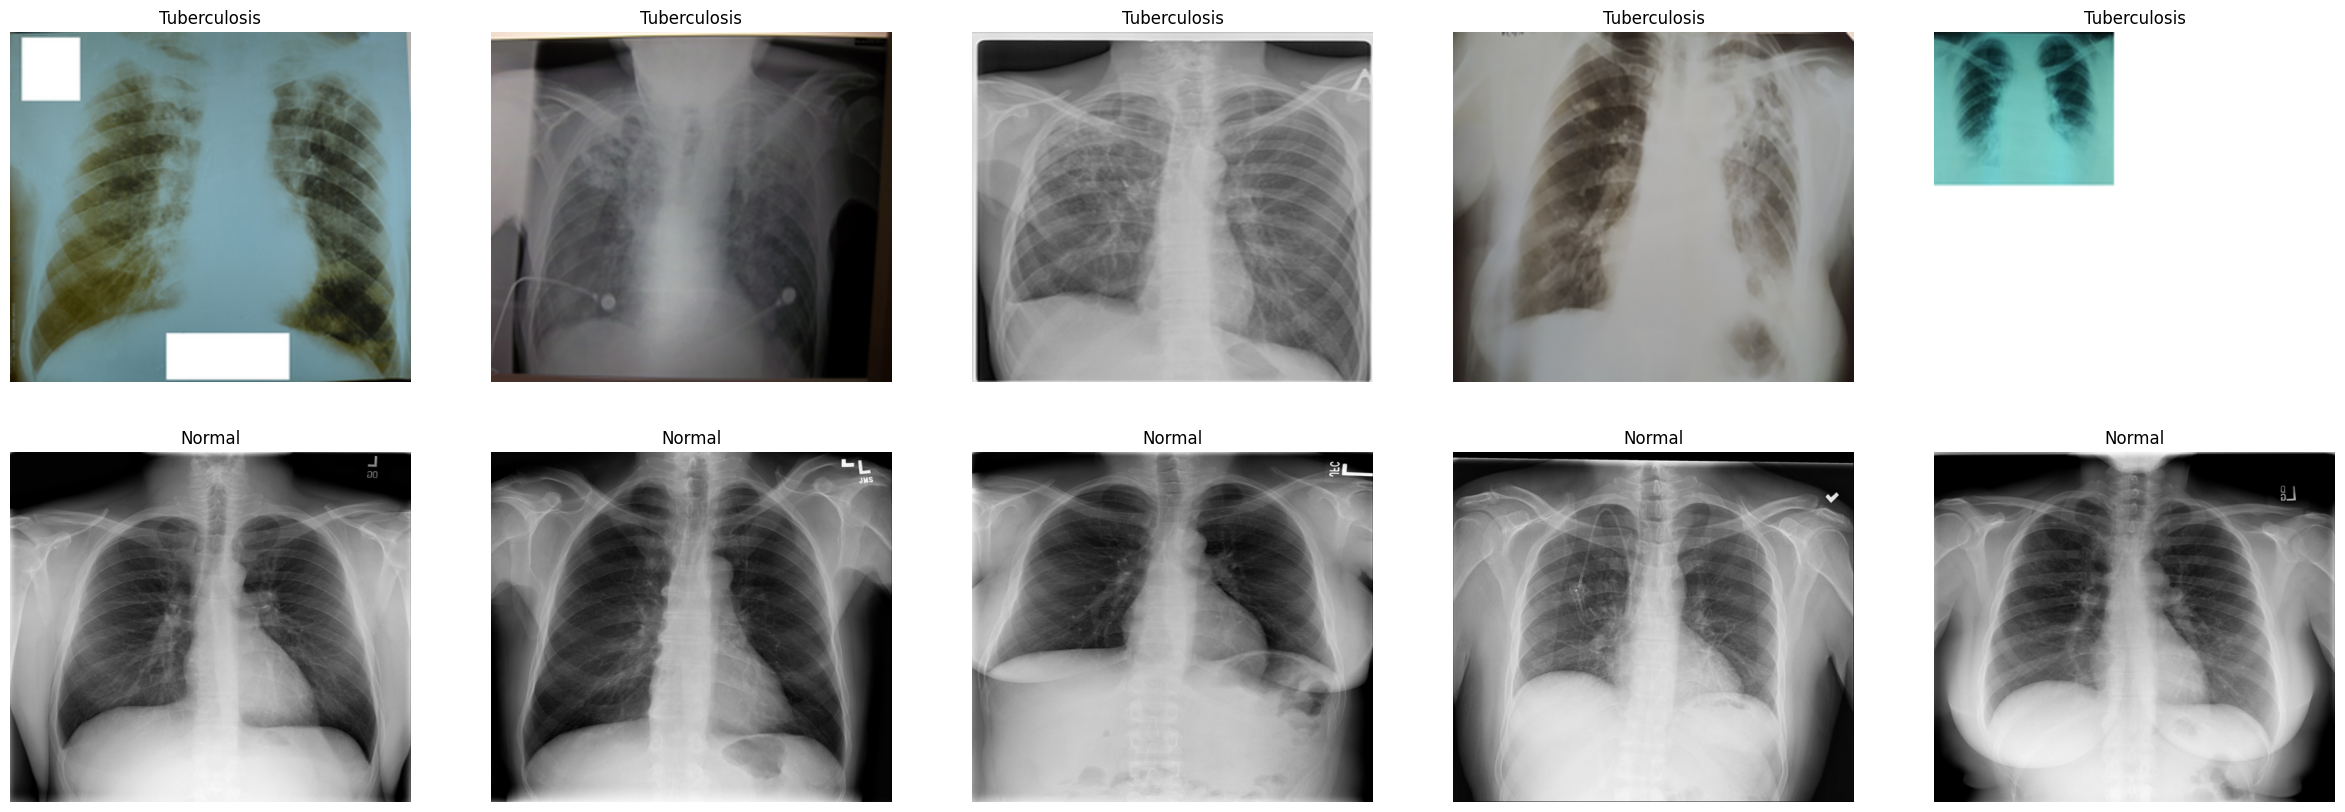

In [6]:
# Get few samples for both the classes
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [8]:
from tqdm import tqdm
train_normal = data_dir / 'Normal'
train_Tuberculosis = data_dir / 'Tuberculosis'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases =Tuberculosis_cases_dir.glob('*.png')
train_data = []
train_labels = []
from keras.utils import to_categorical



for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)
                      
# Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)
    
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

3500it [00:28, 121.39it/s]
700it [00:05, 124.30it/s]

Total number of validation examples:  (4200, 28, 28, 3)
Total number of labels: (4200,)


In [9]:
train_data1[1]

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.56470588, 0.56470588, 0.56470588],
        [0.60392157, 0.60392157, 0.60392157],
        [0.6745098 , 0.6745098 , 0.6745098 ]],

       [[0.05098039, 0.05098039, 0.05098039],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.01960784, 0.01960784, 0.01960784],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.05098039, 0.05098039, 0.05098039],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.04705882, 0.04705882, 0.04705882],
        [0.03529412, 0.03529412, 0.03529412]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.03921569, 0

In [10]:
train_labels1.shape

(4200,)

In [11]:
train_data1.shape

(4200, 28, 28, 3)

In [12]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [13]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1], dtype=int64)

In [14]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    3500
1    3500
Name: label, dtype: int64


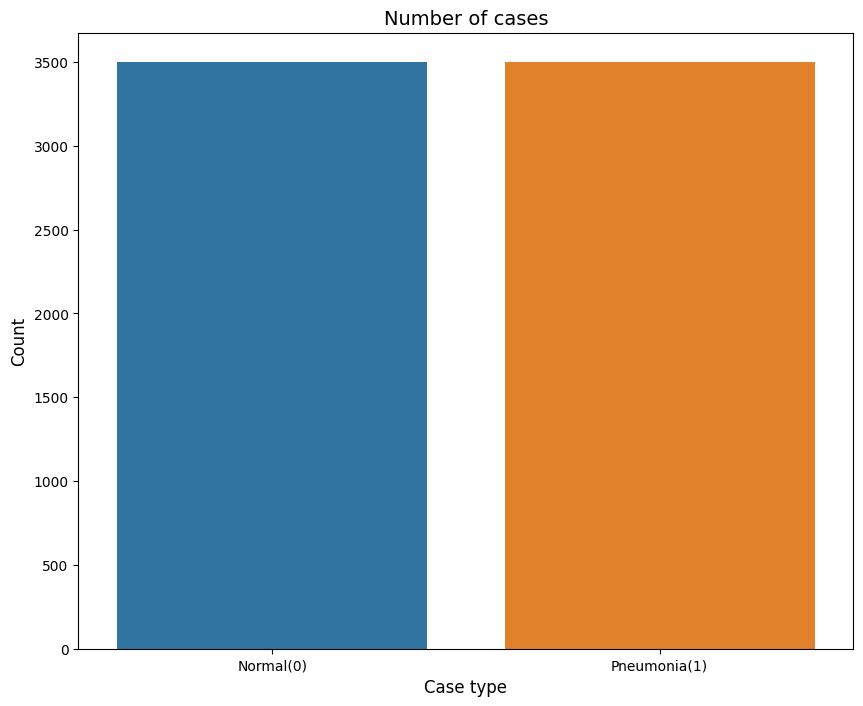

In [15]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [16]:
train_data2.shape

(7000, 2352)

In [17]:
train_labels2.shape

(7000, 1)

In [18]:
train_labels2

,label
0,0
1,0
2,0
3,0
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [19]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [22]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=200, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/200
191/191 [==============================] - 5s 20ms/step - loss: 0.3463 - accuracy: 0.8401 - val_loss: 0.2586 - val_accuracy: 0.8901
Epoch 2/200
191/191 [==============================] - 4s 20ms/step - loss: 0.2250 - accuracy: 0.9076 - val_loss: 0.1549 - val_accuracy: 0.9418
Epoch 3/200
191/191 [==============================] - 4s 20ms/step - loss: 0.2065 - accuracy: 0.9202 - val_loss: 0.1289 - val_accuracy: 0.9560
Epoch 4/200
191/191 [==============================] - 4s 20ms/step - loss: 0.1542 - accuracy: 0.9433 - val_loss: 0.1027 - val_accuracy: 0.9681
Epoch 5/200
191/191 [==============================] - 4s 20ms/step - loss: 0.1462 - accuracy: 0.9466 - val_loss: 0.1343 - val_accuracy: 0.9462
Epoch 6/200
191/191 [==============================] - 4s 20ms/step - loss: 0.1264 - accuracy: 0.9532 - val_loss: 0.1338 - val_accuracy: 0.9484
Epoch 7/200
191/191 [==============================] - 4s 20ms/step - loss: 0.1161 - accuracy: 0.9588 - val_loss: 0.0887 - val_accuracy:

In [25]:
train_labels2['label'].unique()

array([0, 1], dtype=int64)

In [27]:
test_data = []
image='./TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-101.png'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [28]:
test_data1.shape

(1, 28, 28, 3)

In [29]:
a=model.predict(np.array(test_data1))
a

1/1 [==============================] - 0s 97ms/step


array([[-4.5164666,  4.5436215]], dtype=float32)

In [30]:
np.argmax(a)

1

In [31]:
model.save('my_model1')

INFO:tensorflow:Assets written to: my_model1\assets


INFO:tensorflow:Assets written to: my_model1\assets


In [32]:
new_model = tf.keras.models.load_model('./my_model1')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

In [33]:
a=new_model.predict(np.array(test_data1))
a

1/1 [==============================] - 0s 80ms/step


array([[-4.5164666,  4.5436215]], dtype=float32)

In [ ]:
image='./TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png'
img = cv2.imread(str(image))

In [ ]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("tb1.jpg")